<a href="https://colab.research.google.com/github/Mr-houngbo/respire/blob/main/prediction/prediction_polluants_esmt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR

In [2]:
!pip install -q gdown
import gdown

lien = "https://drive.google.com/file/d//view?usp=sharing"


# ID du Dataset
file_id = "1b4sKColUCmG2LhQO54tRA2_okXiTvR8I"
url = f"https://drive.google.com/uc?id={file_id}"
output = "164928.csv"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1b4sKColUCmG2LhQO54tRA2_okXiTvR8I
To: /content/164928.csv
100%|██████████| 3.62k/3.62k [00:00<00:00, 10.1MB/s]


'164928.csv'

In [3]:
esmt = pd.read_csv("164928.csv")

In [4]:
esmt.head()

,Location ID,Location Name,Location Group,Location Type,Sensor ID,Place Open,Local Date/Time,UTC Date/Time,# of aggregated records,PM2.5 (μg/m³) raw,...,Temperature (°C) raw,Temperature (°C) corrected,Heat Index (°C),Humidity (%) raw,Humidity (%) corrected,TVOC (ppb),TVOC index,NOX index,PM1 (μg/m³),PM10 (μg/m³)
0,164928,Breath4life,NaN,Outdoor,airgradient:d83bda1d43d8,True,2025-08-08 00:00:00,2025-08-08T00:00:00.000Z,1173,15.4,...,29.9,30.2,37.6,56,78,123,120,1,5.6,18.1
1,164928,Breath4life,NaN,Outdoor,airgradient:d83bda1d43d8,True,2025-08-07 00:00:00,2025-08-07T00:00:00.000Z,1315,7.9,...,30.3,30.6,38.9,57,79,89,91,1,2.7,9.4
2,164928,Breath4life,NaN,Outdoor,airgradient:d83bda1d43d8,True,2025-08-06 00:00:00,2025-08-06T00:00:00.000Z,1348,8.3,...,31.0,31.5,40.7,54,76,121,115,1,3.7,9.3
3,164928,Breath4life,NaN,Outdoor,airgradient:d83bda1d43d8,True,2025-08-05 00:00:00,2025-08-05T00:00:00.000Z,1312,14.2,...,29.8,30.1,37.5,56,78,133,123,1,6.1,16.2
4,164928,Breath4life,NaN,Outdoor,airgradient:d83bda1d43d8,True,2025-08-04 00:00:00,2025-08-04T00:00:00.000Z,1252,13.5,...,30.2,30.6,37.5,53,74,143,135,1,6.0,15.2


In [5]:
esmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Location ID                 18 non-null     int64  
 1   Location Name               18 non-null     object 
 2   Location Group              0 non-null      float64
 3   Location Type               18 non-null     object 
 4   Sensor ID                   18 non-null     object 
 5   Place Open                  18 non-null     bool   
 6   Local Date/Time             18 non-null     object 
 7   UTC Date/Time               18 non-null     object 
 8   # of aggregated records     18 non-null     int64  
 9   PM2.5 (μg/m³) raw           18 non-null     float64
 10  PM2.5 (μg/m³) corrected     18 non-null     float64
 11  0.3μm particle count        18 non-null     int64  
 12  CO2 (ppm) raw               18 non-null     int64  
 13  CO2 (ppm) corrected         18 non-nu

In [ ]:
esmt.shape

(18, 24)

In [ ]:
df = esmt.copy()

In [ ]:
df.isnull().sum()

,0
Location ID,0
Location Name,0
Location Group,18
Location Type,0
Sensor ID,0
Place Open,0
Local Date/Time,0
UTC Date/Time,0
# of aggregated records,0
PM2.5 (μg/m³) raw,0


In [ ]:
# Supprimer colonnes inutiles
cols_a_supprimer = [
    'Location ID', 'Location Name', 'Location Group', 'Location Type',
    'Sensor ID', 'Place Open', 'UTC Date/Time','# of aggregated records'] + [col for col in df.columns if "raw" in col.lower()]  # remove raw

df.drop(columns=cols_a_supprimer, inplace=True, errors='ignore')

In [ ]:
df.isnull().sum()

,0
Local Date/Time,0
PM2.5 (μg/m³) corrected,0
0.3μm particle count,0
CO2 (ppm) corrected,0
Temperature (°C) corrected,0
Heat Index (°C),0
Humidity (%) corrected,0
TVOC (ppb),0
TVOC index,0
NOX index,0


In [ ]:
df.shape

(18, 12)

In [ ]:
num_cols = df.select_dtypes(include = ["number"]).columns
cat_cols = df.select_dtypes(include = ["object"]).columns

In [ ]:
# Convertir la date en datetime + tri
df['Local Date/Time'] = pd.to_datetime(df['Local Date/Time'])
df.sort_values('Local Date/Time', inplace=True)
df.set_index('Local Date/Time', inplace=True)

In [ ]:
df.head()

,PM2.5 (μg/m³) corrected,0.3μm particle count,CO2 (ppm) corrected,Temperature (°C) corrected,Heat Index (°C),Humidity (%) corrected,TVOC (ppb),TVOC index,NOX index,PM1 (μg/m³),PM10 (μg/m³)
Local Date/Time,,,,,,,,,,,
2025-07-18,10.5,481,654,32.5,46.7,81,96,102,1,4.5,12.3
2025-07-22,24.4,740,505,33.0,45.9,75,95,101,1,9.3,26.5
2025-07-24,6.7,371,400,27.2,29.5,77,67,69,1,2.3,7.7
2025-07-25,4.8,310,396,28.4,31.7,73,94,94,1,1.5,5.6
2025-07-26,5.4,349,395,30.3,35.4,69,113,110,2,2.2,6.3


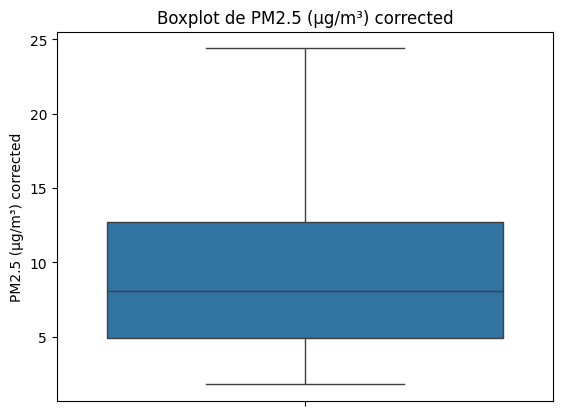

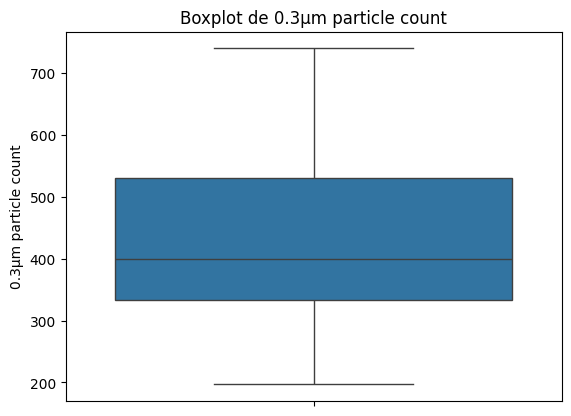

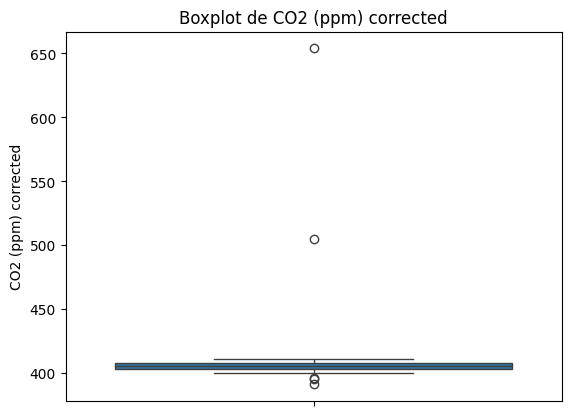

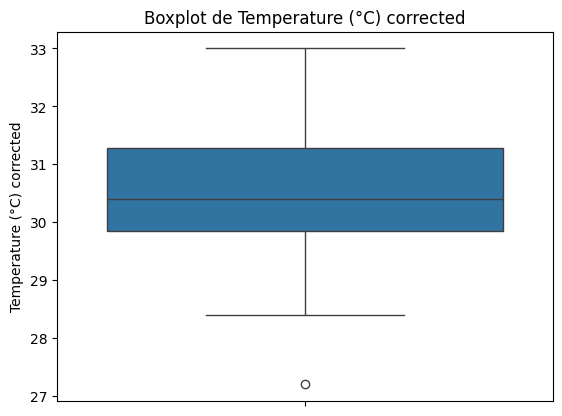

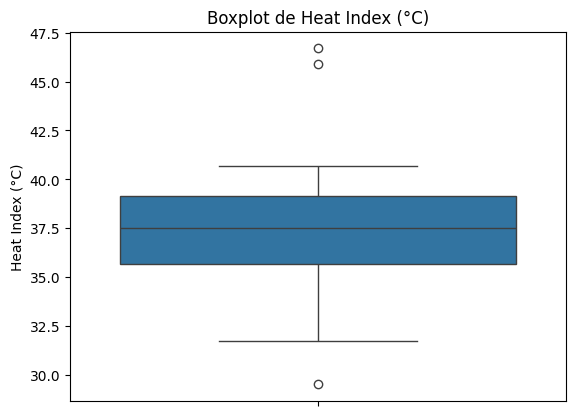

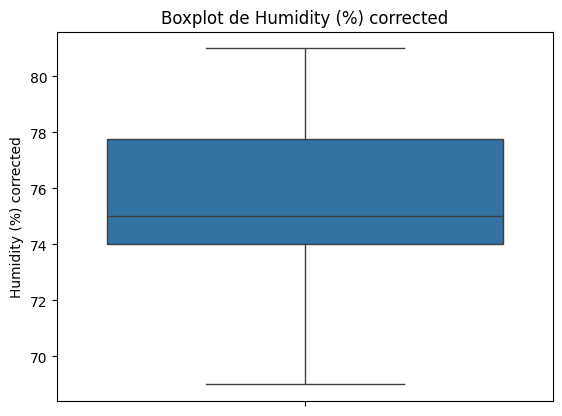

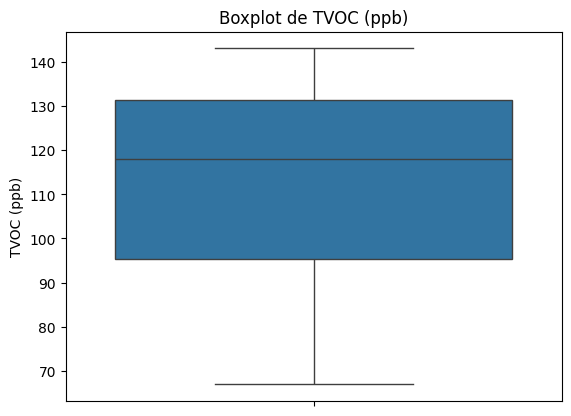

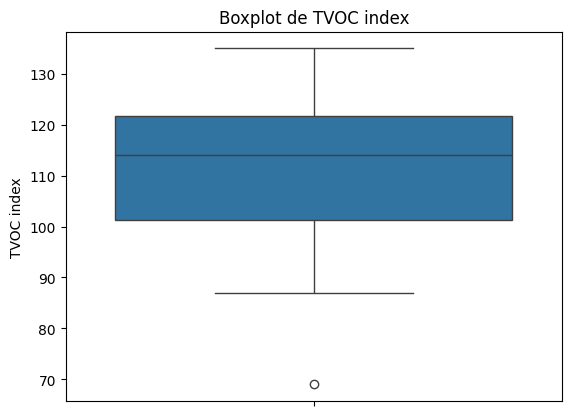

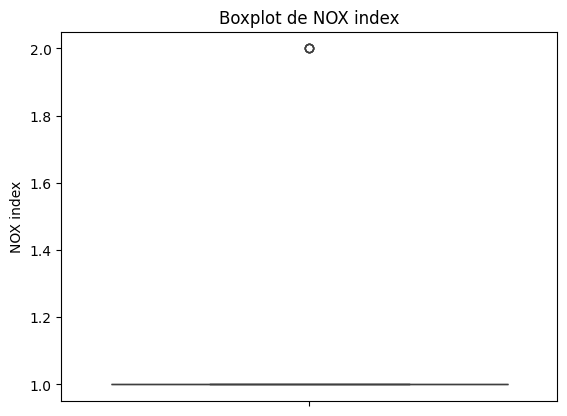

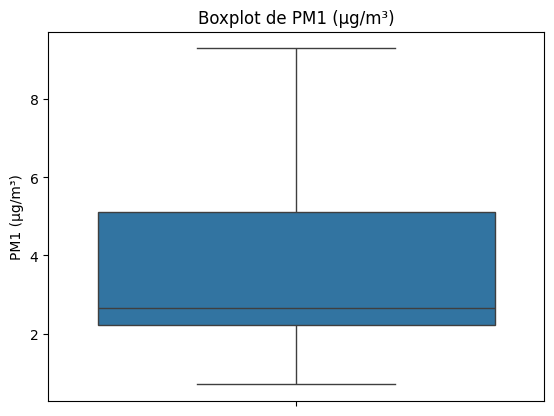

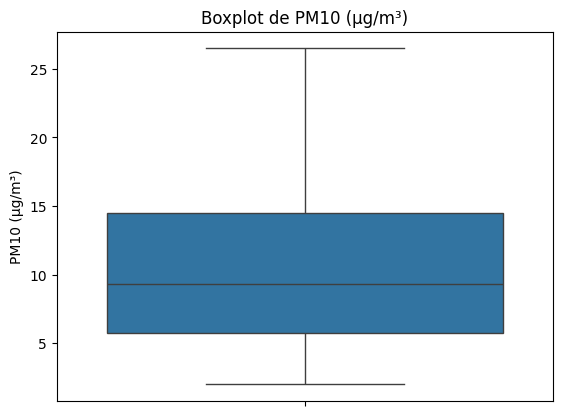

In [ ]:
for col in num_cols:
    sns.boxplot(df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

In [ ]:
# === 2. Fenêtrage glissant pour J+1 ===
def create_lag_features(data, target_col, lags=7):
    df_feat = pd.DataFrame(index=data.index)
    for lag in range(1, lags+1):
        df_feat[f"{target_col}_lag{lag}"] = data[target_col].shift(lag)
    df_feat['target'] = data[target_col].shift(-1)  # prédire J+1
    return df_feat.dropna()


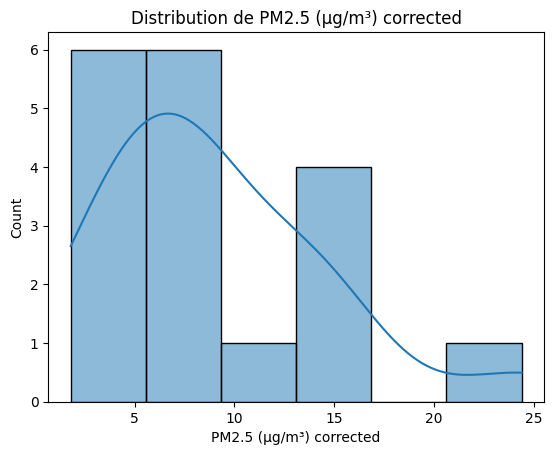

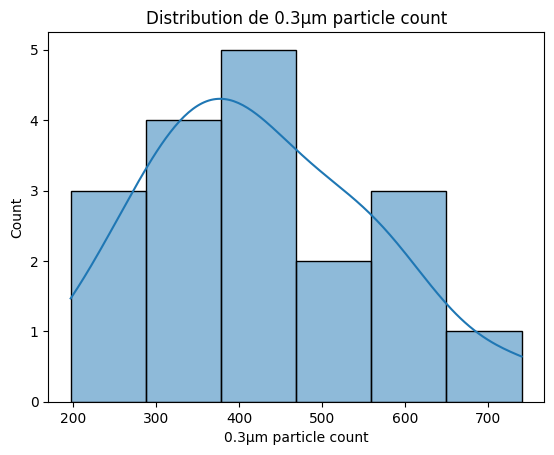

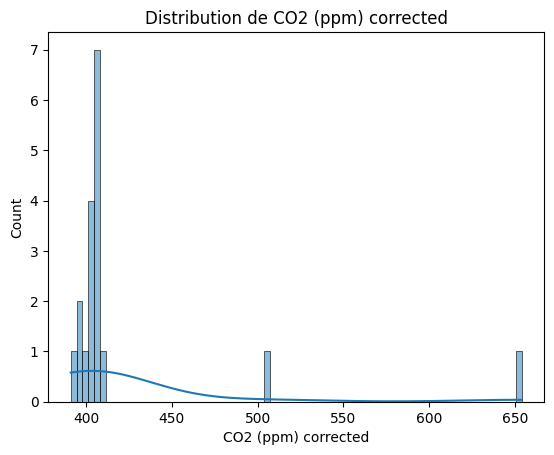

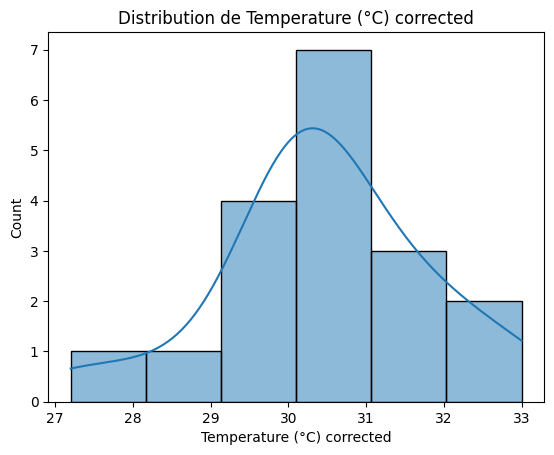

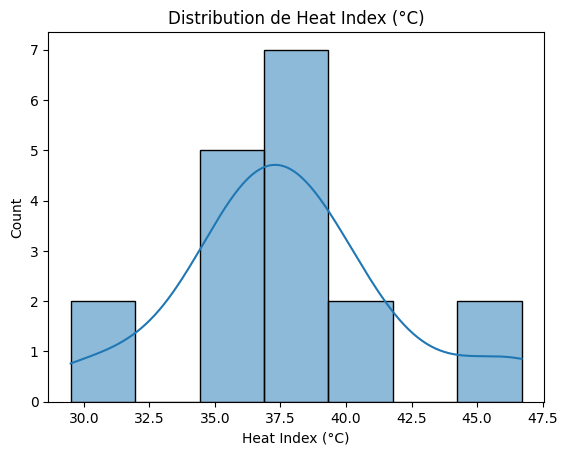

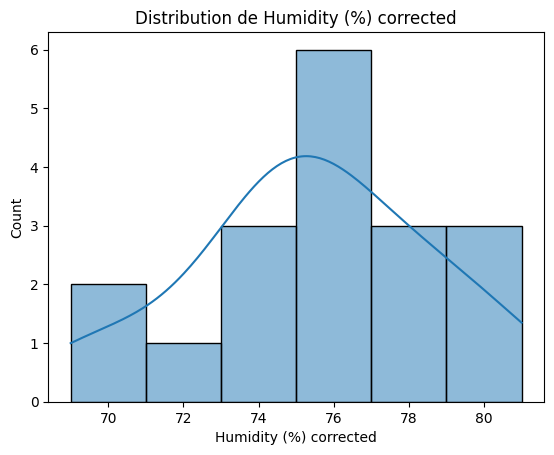

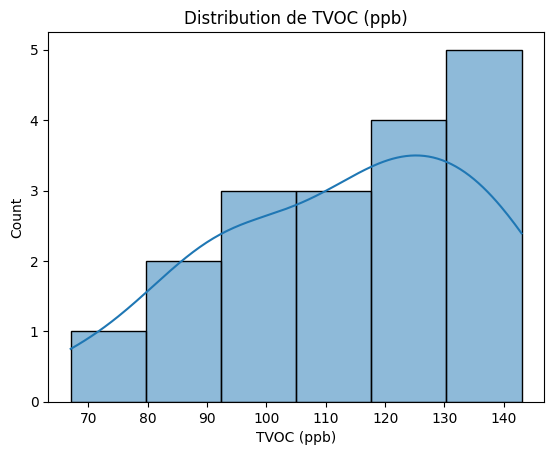

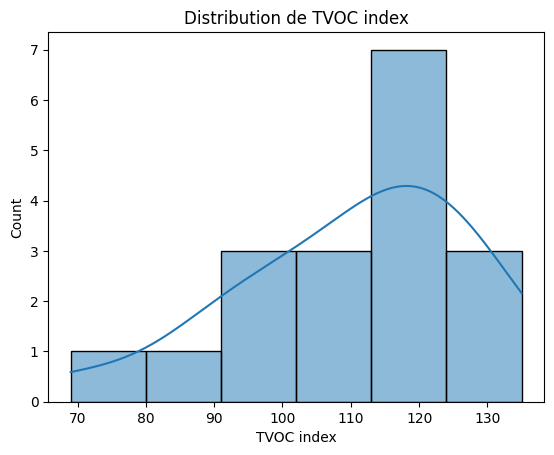

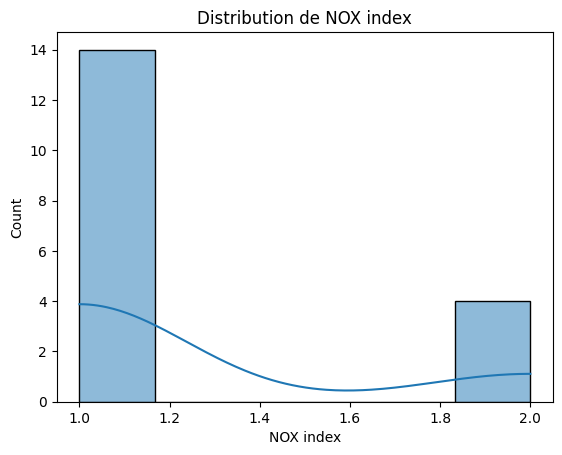

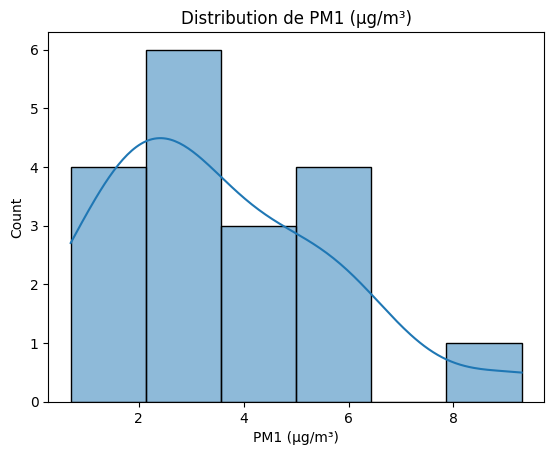

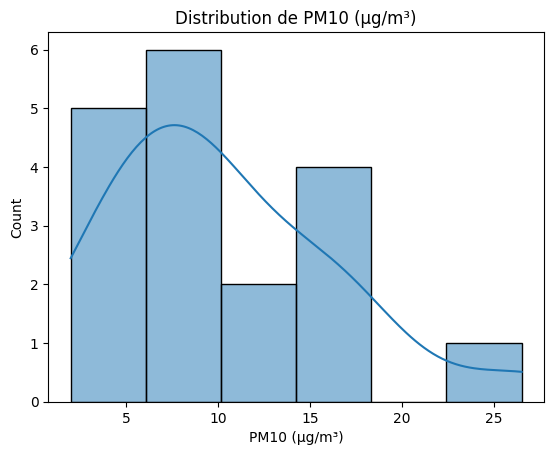

In [ ]:
for col in num_cols:
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()

<Axes: >

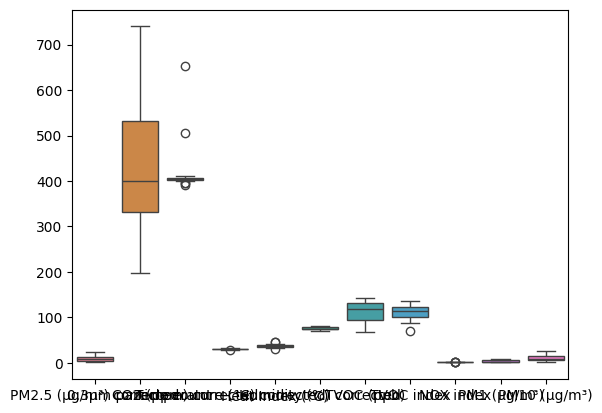

In [ ]:
sns.boxplot(df)

<Axes: >

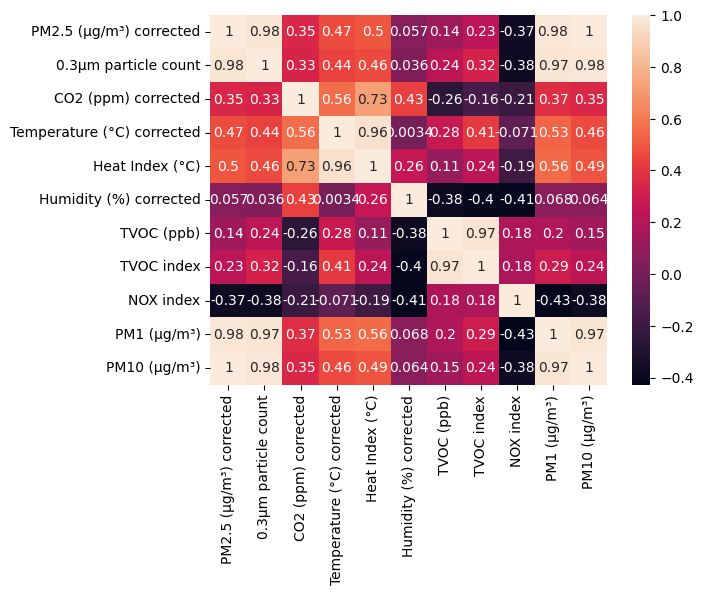

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
# ==== 1. Imports ====
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import joblib


# ==== 2. Fonction de transformation en problème supervisé ====
def create_supervised(df, n_lags=1):
    """
    Transforme un DataFrame en jeu de données supervisé avec décalages temporels.

    Args:
        df (pd.DataFrame): Jeu de données original, indexé par date.
        n_lags (int): Nombre de jours en mémoire (features décalées).

    Returns:
        pd.DataFrame: Jeu de données supervisé avec colonnes t-1, t-2, ..., t et sans NaN.
    """
    df_supervised = pd.DataFrame()

    # Ajout des décalages (features passées)
    for i in range(n_lags, 0, -1):
        shifted = df.shift(i)
        shifted.columns = [f"{col}(t-{i})" for col in df.columns]
        df_supervised = pd.concat([df_supervised, shifted], axis=1)

    # Ajout des valeurs cibles (temps présent)
    df_supervised = pd.concat([df_supervised, df], axis=1)

    # Suppression des lignes avec NaN
    df_supervised.dropna(inplace=True)
    return df_supervised


# ==== 3. Paramètres ====
n_lags = 3  # Nombre de jours utilisés pour prédire J+1
df = esmt.copy()  # Exemple : chargement dataset

# Supprimer colonnes inutiles
cols_a_supprimer = [
    'Location ID', 'Location Name', 'Location Group', 'Location Type',
    'Sensor ID', 'Place Open', 'UTC Date/Time','# of aggregated records'] + [col for col in df.columns if "raw" in col.lower()]  # remove raw

df.drop(columns=cols_a_supprimer, inplace=True, errors='ignore')

# Convertir la date en datetime + tri
df['Local Date/Time'] = pd.to_datetime(df['Local Date/Time'])
df.sort_values('Local Date/Time', inplace=True)
df.set_index('Local Date/Time', inplace=True)


# Création des données supervisées
data_supervised = create_supervised(df, n_lags=n_lags)


# ==== 4. Split Train/Test ====
train_size = int(len(data_supervised) * 0.8)
train, test = data_supervised.iloc[:train_size], data_supervised.iloc[train_size:]

# Séparation Features / Targets
X_train, y_train = train.iloc[:, :-len(df.columns)], train.iloc[:, -len(df.columns):]
X_test, y_test = test.iloc[:, :-len(df.columns)], test.iloc[:, -len(df.columns):]


# ==== 5. Normalisation ====
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)



# ====  Définition du modèle de base ====
base_model = XGBRegressor(random_state=42)

# MultiOutput wrapper
multi_output_model = MultiOutputRegressor(base_model)

# ==== . Grille d'hyperparamètres ====
param_grid = {
    "estimator__n_estimators": [100, 200, 300],
    "estimator__learning_rate": [0.01, 0.05, 0.1],
    "estimator__max_depth": [3, 5, 7],
    "estimator__subsample": [0.8, 1.0],
    "estimator__colsample_bytree": [0.8, 1.0]
}

# ==== . Cross Validation + Grid Search ====
grid_search = GridSearchCV(
    estimator=multi_output_model,
    param_grid=param_grid,
    cv=5,  # nombre de folds
    scoring='r2',  # ou 'neg_mean_squared_error'
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train_scaled)

# ==== . Résultats ====
print("Meilleurs paramètres :", grid_search.best_params_)
print("Score CV (meilleur) :", grid_search.best_score_)

# ==== . Utilisation du meilleur modèle ====
model = grid_search.best_estimator_

# Réentraînement sur tout le jeu d'entraînement
model.fit(X_train_scaled, y_train_scaled)



# ==== 7. Prédiction et métriques ====
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

results = {"RMSE": rmse, "MAE": mae, "R2": r2}
print("📊 Performance du modèle :", results)


# ==== 8. Sauvegarde du modèle et paramètres ====
joblib.dump(model, "xgboost_multioutput.pkl")
joblib.dump(scaler_X, "scaler_X.pkl")
joblib.dump(scaler_y, "scaler_y.pkl")
joblib.dump(df.columns.tolist(), "target_columns.pkl")  # Sauvegarde des noms de colonnes cibles
joblib.dump(n_lags, "n_lags.pkl")  # Sauvegarde du nombre de lags
print("✅ Modèle, scalers, colonnes et paramètres sauvegardés !")


# ==== 9. Fonction de prédiction J+1 ====
def predict_j_plus_1(last_days_df, model_path="xgboost_multioutput.pkl"):
    """
    Prédit les valeurs du jour suivant à partir des n_lags derniers jours.

    Args:
        last_days_df (pd.DataFrame): Les n_lags derniers jours d'historique (index = dates).
        model_path (str): Chemin vers le modèle sauvegardé.

    Returns:
        pd.DataFrame: Valeurs prédites pour J+1.
    """
    # Chargement du modèle et des paramètres
    model = joblib.load(model_path)
    scaler_X = joblib.load("scaler_X.pkl")
    scaler_y = joblib.load("scaler_y.pkl")
    target_columns = joblib.load("target_columns.pkl")
    n_lags = joblib.load("n_lags.pkl")

    # Vérification du nombre de jours d'historique
    if len(last_days_df) != n_lags:
        raise ValueError(f"Il faut exactement {n_lags} jours d'historique pour prédire.")

         # Construction des features pour la prédiction
    features = []
    for i in range(n_lags, 0, -1):
        features.extend(last_days_df.iloc[-i].values)

    # Reformater en DataFrame avec les bons noms
    feature_names = []
    for i in range(n_lags, 0, -1):
        feature_names.extend([f"{col}(t-{i})" for col in target_columns])

    features_df = pd.DataFrame([features], columns=feature_names)

    # Scaling et prédiction
    features_scaled = scaler_X.transform(features_df)
    pred_scaled = model.predict(features_scaled)
    pred = scaler_y.inverse_transform(pred_scaled)


    # Retour sous forme de DataFrame
    return pd.DataFrame(
        pred,
        columns=target_columns,
        index=[last_days_df.index[-1] + pd.Timedelta(days=1)]
    )


# ==== 10. Exemple d'utilisation ====
dernier_jours = df.tail(n_lags)
print("🔮 Prédiction J+1 :")
print(predict_j_plus_1(dernier_jours))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Meilleurs paramètres : {'estimator__colsample_bytree': 1.0, 'estimator__learning_rate': 0.05, 'estimator__max_depth': 7, 'estimator__n_estimators': 300, 'estimator__subsample': 0.8}
Score CV (meilleur) : -68.2182194357856
📊 Performance du modèle : {'RMSE': np.float64(33.872817597304255), 'MAE': 14.45130575208953, 'R2': -2.15188471169397}
✅ Modèle, scalers, colonnes et paramètres sauvegardés !
🔮 Prédiction J+1 :
            PM2.5 (μg/m³) corrected  0.3μm particle count  \
2025-08-09                12.664956            554.870605   

            CO2 (ppm) corrected  Temperature (°C) corrected  Heat Index (°C)  \
2025-08-09           403.189789                   29.469826        36.047474   

            Humidity (%) corrected  TVOC (ppb)  TVOC index  NOX index  \
2025-08-09               71.930626  115.272095  115.322655   1.000904   

            PM1 (μg/m³)  PM10 (μg/m³)  
2025-08-09     4.998051      14.38587  
